# Question 1 

## 1(a)

[5 5 3 2 6 5 3 2 4 4 1 1 3 3 6 2 2 2 2 2 6 5 1 4 4 4 2 3 5 3 5 5 2 1 2 3 2
 1 3 3 2 3 3 2 2 1 3 5 5 5 5 3 6 1 3 5 5 5 6 3 3 2 5 1 2 3 2 3 1 4 2 5 4 5
 3 3 2 1 2 5 4 3 4 1 2 5 5 5 5 5 3 2 2 5 2 5 2 1 1 5 2 2 3 5 4 6 2 1 2 3 2
 1 6 2 3 3 2 5 2 2 5 1 2 2 6 3 1 3 2 3 5 2 4 2 3 1 5 3 1 1 2 5 3 3 3 4 5 5
 1 5 3 2 2 5 2 4 2 3 3 5 3 4 2 1 2 2 3 3 1 2 5 5 1 2 1 3 2 2 2 3 3 3 3 1 1
 1 2 2 3 1 5 2 1 3 2 5 1 2 4 2 4 5 3 5 5 2 6 2 2 3 6 3 2 6 2 2 2 5 2 2 3 2
 2 1 5 3 5 3 3 6 3 6 4 2 5 2 3 4 5 2 3 1 5 2 5 1 3 5 1 1 1 5 6 6 1 2 5 4 1
 2 5 1 3 1 2 2 6 1 6 5 6 1 2 5 2 1 5 4 5 6 2 1 6 4 2 6 2 2 3 4 3 5 6 2 6 2
 2 6 5 5 5 6 4 1 4 4 3 4 3 2 5 2 2 3 4 4 1 2 1 2 2 4 5 4 1 2 1 5 2 4 6 6 1
 5 5 5 3 2 6 4 5 5 2 4 6 3 1 5 4 4 2 3 1 2 1 3 1 2 3 4 3 2 2 6 5 2 6 1 2 6
 1 4 2 1 3 1 5 3 3 3 5 2 2 5 5 2 2 1 6 1 5 3 5 5 2 6 5 3 2 2 3 5 3 2 1 1 2
 1 5 5 2 2 3 2 5 2 3 3 3 2 6 1 2 2 5 3 1 2 2 3 1 2 4 5 3 5 3 5 3 4 6 3 4 6
 3 4 3 2 3 2 2 6 4 2 2 5 5 5 2 3 5 2 3 2 2 3 2 3 1 6 4 6 2 1 2 3 6 6 2 1 5
 6 5 5 2 2 3 2 2 2 2 2 2 

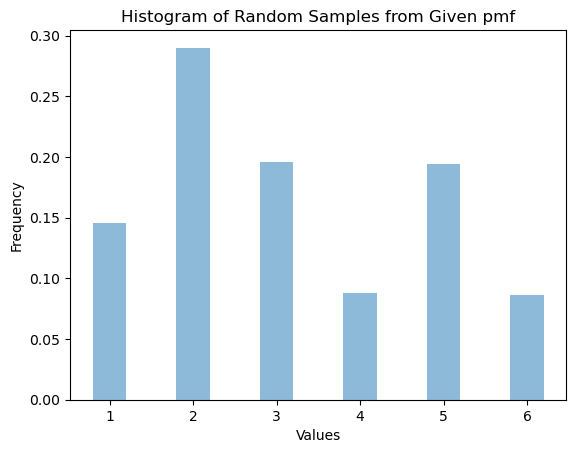

In [29]:
## import modules
import numpy as np
import matplotlib.pyplot as plt

### Part 1 :  Inverse CDF method to drive PMF for discrete variable

# Define the PMF of the discrete distribution
x_values = np.array([1, 2, 3, 4, 5, 6])
pmf = np.array([0.1, 0.3, 0.2, 0.1, 0.2, 0.1])

# Cumulative distribution function (CDF)-
cdf = np.cumsum(pmf)

# Inverse transform method to sample from the discrete distribution
def inverse_transform_sampling(cdf, values, n):
    u = np.random.rand(n)
    samples = np.searchsorted(cdf, u)
    return values[samples]

# Number of samples to generate
sample_size = 500

# Generate random samples using the inverse transform method
samples = inverse_transform_sampling(cdf, x_values, sample_size)

# Display the sampled data
print(samples)

# Plot a histogram of the generated samples
plt.hist(samples, bins=np.arange(0.5, 7.5, 1), align='mid', rwidth=0.4, alpha=0.5, density=True)
plt.title('Histogram of Random Samples from Given pmf')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

## 1(b)

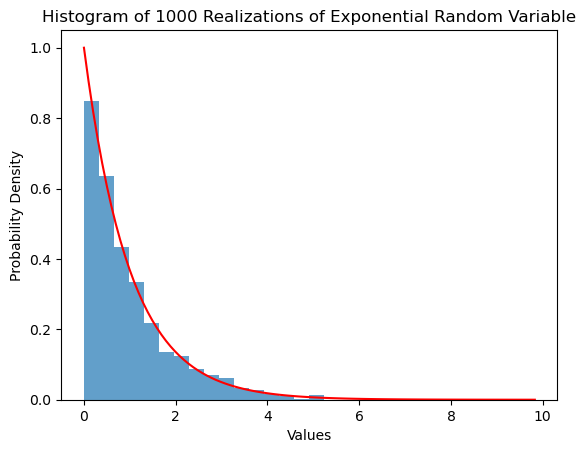

In [28]:
### Part 2 :  Inverse CDF method to derive pdf for continous variable

# Define the CDF of the standard exponential distribution
def exponential_cdf(x, lamda):
    return 1 - np.exp(-lamda * x)

# Inverse CDF method to sample from the standard exponential distribution
def inverse_cdf_exponential(lamda, size=1000):
    u = np.random.rand(size)
    x = -np.log(1 - u) / lamda
    return x

# Parameters for the standard exponential distribution
lamda = 1
sample_size = 1000

# Generate random samples using the inverse CDF method
samples = inverse_cdf_exponential(lamda,size=1000)

# for plotting the the theoretical pdf for comparison
def theoretical_pdf(x, lambda_val):
    return lambda_val * np.exp(-lambda_val * x)
x_theoretical = np.linspace(0, max(samples), 100)

# Plot a histogram of the generated samples
plt.hist(samples, bins=30, density=True, alpha=0.7)
plt.plot(x_theoretical, theoretical_pdf(x_theoretical, lamda), 'r-', label='Theoretical PDF')
plt.title('Histogram of 1000 Realizations of Exponential Random Variable')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.show()



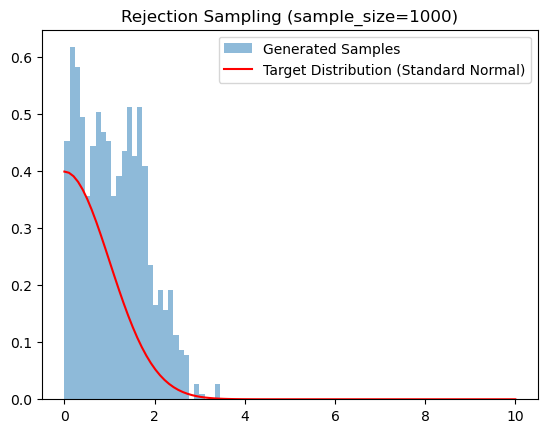

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the target distribution (PDF)
def target_distribution(x):
    return norm.pdf(x, loc=0, scale=1)

# Define the proposal distribution (uniform)
def proposal_distribution(x, lower_bound, upper_bound):
    return 1 / (upper_bound - lower_bound)

# Number of samples to generate
sample_size = 1000

# Define lower bound and upper bound of uniform distribution
lower_bound = 0
upper_bound = 10

# Rejection method to sample from the target distribution
samples = []
samples1=[]
while len(samples) < sample_size:
    x = np.random.uniform(lower_bound, upper_bound)
    y = np.random.uniform(0, 1)
    if y <= target_distribution(x) / proposal_distribution(x, lower_bound, upper_bound):
        samples.append(x)

# Plot a histogram of the generated samples
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Generated Samples')
x_vals = np.linspace(lower_bound, upper_bound, 100)
plt.plot(x_vals, target_distribution(x_vals), 'r', label='Target Distribution (Standard Normal)')
plt.title('Rejection Sampling (sample_size=1000)')
plt.legend()
plt.show()


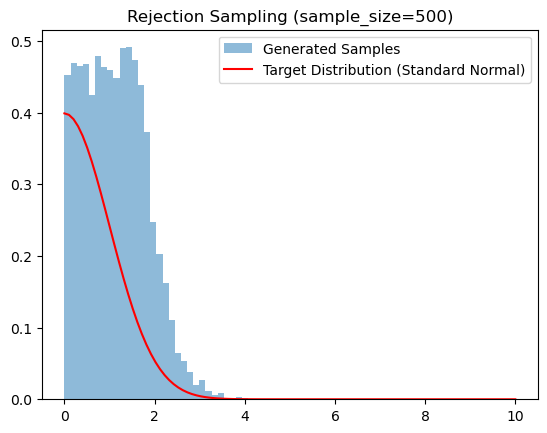

In [22]:
# Define the target distribution (PDF)
def target_distribution(x):
    return norm.pdf(x, loc=0, scale=1)

# Define the proposal distribution (uniform)
def proposal_distribution(x, lower_bound, upper_bound):
    return 1 / (upper_bound - lower_bound)

# Number of samples to generate
sample_size = 5000

# Define lower bound and upper bound of uniform distribution
lower_bound = 0
upper_bound = 10

# Rejection method to sample from the target distribution
samples = []
samples1=[]
while len(samples) < sample_size:
    x = np.random.uniform(lower_bound, upper_bound)
    y = np.random.uniform(0, 1)
    if y <= target_distribution(x) / proposal_distribution(x, lower_bound, upper_bound):
        samples.append(x)

# Plot a histogram of the generated samples
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Generated Samples')
x_vals = np.linspace(lower_bound, upper_bound, 100)
plt.plot(x_vals, target_distribution(x_vals), 'r', label='Target Distribution (Standard Normal)')
plt.title('Rejection Sampling (sample_size=5000)')
plt.legend()
plt.show()

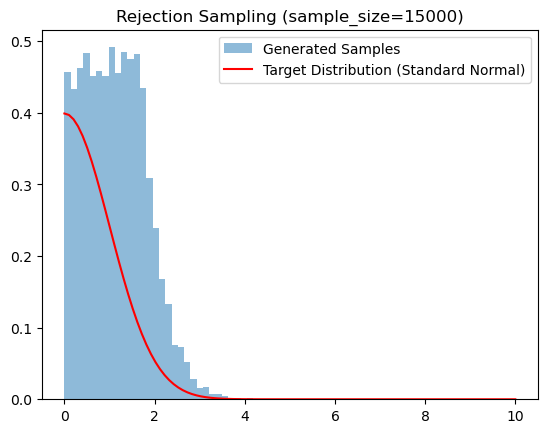

In [23]:
# Define the target distribution (PDF)
def target_distribution(x):
    return norm.pdf(x, loc=0, scale=1)

# Define the proposal distribution (uniform)
def proposal_distribution(x, lower_bound, upper_bound):
    return 1 / (upper_bound - lower_bound)

# Number of samples to generate
sample_size = 15000

# Define lower bound and upper bound of uniform distribution
lower_bound = 0
upper_bound = 10

# Rejection method to sample from the target distribution
samples = []
samples1=[]
while len(samples) < sample_size:
    x = np.random.uniform(lower_bound, upper_bound)
    y = np.random.uniform(0, 1)
    if y <= target_distribution(x) / proposal_distribution(x, lower_bound, upper_bound):
        samples.append(x)

# Plot a histogram of the generated samples
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Generated Samples')
x_vals = np.linspace(lower_bound, upper_bound, 100)
plt.plot(x_vals, target_distribution(x_vals), 'r', label='Target Distribution (Standard Normal)')
plt.title('Rejection Sampling (sample_size=15000)')
plt.legend()
plt.show()

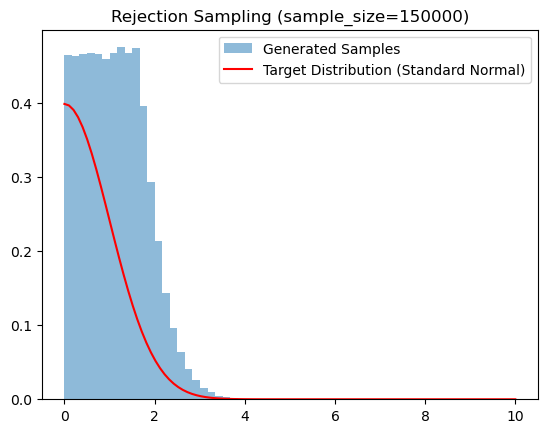

In [24]:
# Define the target distribution (PDF)
def target_distribution(x):
    return norm.pdf(x, loc=0, scale=1)

# Define the proposal distribution (uniform)
def proposal_distribution(x, lower_bound, upper_bound):
    return 1 / (upper_bound - lower_bound)

# Number of samples to generate
sample_size = 150000

# Define lower bound and upper bound of uniform distribution
lower_bound = 0
upper_bound = 10

# Rejection method to sample from the target distribution
samples = []
samples1=[]
while len(samples) < sample_size:
    x = np.random.uniform(lower_bound, upper_bound)
    y = np.random.uniform(0, 1)
    if y <= target_distribution(x) / proposal_distribution(x, lower_bound, upper_bound):
        samples.append(x)

# Plot a histogram of the generated samples
plt.hist(samples, bins=30, density=True, alpha=0.5, label='Generated Samples')
x_vals = np.linspace(lower_bound, upper_bound, 100)
plt.plot(x_vals, target_distribution(x_vals), 'r', label='Target Distribution (Standard Normal)')
plt.title('Rejection Sampling (sample_size=150000)')
plt.legend()
plt.show()

### Increasing the sample size is leading to a smoother histogram because, with more samples, the distribution of values better reflects the underlying target distribution. This is in line with the law of large numbers, which states that as the sample size increases, the sample mean converges to the true mean. Additionally, as the sample size grows, the histogram becomes more flattened at the top.

## Bonus Question

In [27]:
##Bonus


## Solution:
# * P(Disease): (prevalence rate) = 0.01 (1%).
# * P(No Disease): 1 - P(Disease) = 0.99 (99%).
# * P(Positive | Disease): (sensitivity) = 0.95 (95%).
# * P(Negative | Disease): 1 - P(Positive | Disease) = 0.05.
# * P(Positive | No Disease): (false positive rate) = 0.10 (10%).
# * P(Negative | No Disease): (specificity) = 0.90 (90%).
# * P(Disease∣Positive)= (0.95*0.01)/(0.95*0.01 + 0.1*0.99)  = 0.08755 = 8.755%


# Define the parameters
sensitivity = 0.95
specificity = 0.90
prevalence = 0.01

# Number of simulations
num_simulations = 1000

# Simulate the problem and calculate the probability using inverse CDF method
positive_given_disease = sensitivity
negative_given_no_disease = specificity
disease_probability=prevalence
disease_samples = np.random.rand(num_simulations) < prevalence

print(disease_samples)
# Calculate the probability that the person has the disease given a positive result 

positive_given_test_results = np.random.rand(num_simulations)
positive_given_test_results[disease_samples] = positive_given_disease
positive_given_test_results[~disease_samples] = 1-specificity

probability_estimation = (positive_given_disease * disease_probability / positive_given_test_results.mean())
print("Estimated probability that the person has the disease given a positive test result:", probability_estimation)

# Bayes' Theorem to calculate the probability that the person has the disease given a positive test result
disease_given_positive_test_results = (sensitivity * prevalence) / (sensitivity * prevalence + (1 - specificity) * (1 - prevalence))
print("formula given probability that the person has the disease given a positive test result:", disease_given_positive_test_results)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa